In [102]:
import requests, re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Question 1
Task a:

In [103]:
#Get text
r = requests.get("https://raw.githubusercontent.com/aalanwar/Logical-Zonotope/refs/heads/main/README.md")

#Counts all occurances of words
def count_occurrence(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)



Task b:

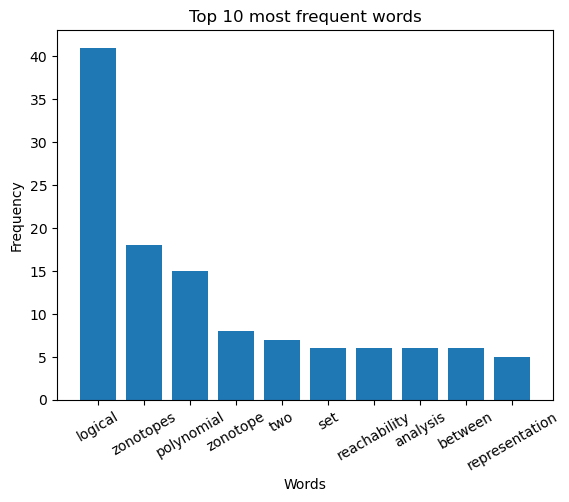

In [104]:
def count_occurrences_and_plot(text):
    words = re.findall(r'\b[a-z]+\b', text.lower())
    #setting all common words as excluded until no common words appear in the top 10
    excluded_words = ['the', 'a', 'an', 'be', 'br', 'and', 'of', 'to', 'for', 'z', 'or', 'in', 'we', 'on']

    #remove word from the list if contained in excluded words list
    filtered_words = [word for word in words if word not in excluded_words]

    count = Counter(filtered_words)

    list = count.most_common(10)

    #Plot as histogram
    words, occurrences = zip(*list)
    plt.bar(words, occurrences)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.title("Top 10 most frequent words")

    plt.show()

count_occurrences_and_plot(r.text)

Task c:

Mean: -0.7515041499341265 
Standard deviation: 9.327996140647857 


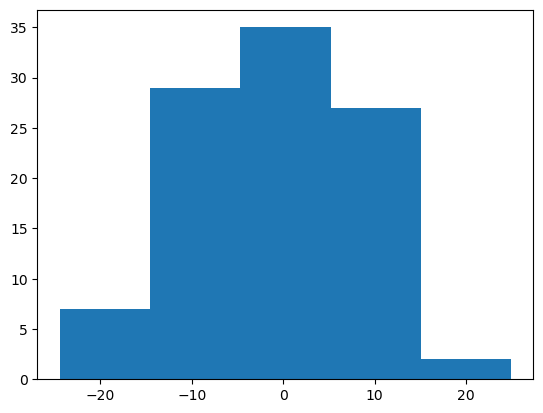

In [105]:
A = np.random.randn(100, 20)
v = np.random.normal(2,0.01,20)

#Iterative elementwise multiplication of each row of a matrix with a vector is equivalent to a normal matrix multiplication
c = np.dot(A,v)

mean = np.mean(c)
std_dev = np.std(c)

print(f"Mean: {mean} ")
print(f"Standard deviation: {std_dev} ")

#plotting vector c as histogram with 5 bins
plt.hist(c, bins=5)
plt.show()

The highest peak coincides with the mean of the vector

# Question 2


In [106]:
#Initializing matrices with varying standard deviation
A_1 = np.random.normal(2,0.01,(100,2))
A_2 = np.random.normal(2,0.1,(100,2))
A_3 = np.random.normal(2,1,(100,2))


#Algorithm 1 (Learn Simple Linear Regression)
def simple_linear_regression(data):

    #Calculate mean of columns
    (x_mean, y_mean) = np.mean(data, axis=0)
    x_y = np.array([x_mean, y_mean])

    #Subtract vector with [x_mean, y_mean] from each row
    data1 = data - x_y

    #Perform elementwise multiplication of both columns and add the resulting values
    product_numerator = data1[:, 0] * data1[:, 1]
    sum_product_numerator = np.sum(product_numerator)

    #Perform elementwise multiplication of first column with itself and add the resulting values
    product_denominator = data1[:, 0] * data1[:, 0]
    sum_product_denominator = np.sum(product_denominator)

    beta_1 = sum_product_numerator / sum_product_denominator
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1


#Algorithm 2 (Predict using Simple Linear Regression)
def predict_using_slg(data_point, beta_0, beta_1):
    target_prediction = beta_0 + beta_1 * data_point
    return target_prediction


Learning $\beta_0$ and $\beta_1$ for Matrix $A_1$, $A_2$ and $A_3$ respectively and then using them to predict the targets.


In [107]:
#Training on Matrix A_1
beta_0_A1, beta_1_A1 = simple_linear_regression(A_1)
#Calculate predictions for all x in A_1 and save as Matrix
predictions_A1 = np.array([[x, predict_using_slg(x, beta_0_A1, beta_1_A1)] for x in A_1[:,0]])

#Matrix A_2
beta_0_A2, beta_1_A2 = simple_linear_regression(A_2)
predictions_A2 = np.array([[x, predict_using_slg(x, beta_0_A2, beta_1_A2)] for x in A_2[:,0]])

#Matrix A_3
beta_0_A3, beta_1_A3 = simple_linear_regression(A_3)
predictions_A3 = np.array([[x, predict_using_slg(x, beta_0_A3, beta_1_A3)] for x in A_3[:,0]])



Plotting training and predicted values for $A_1$

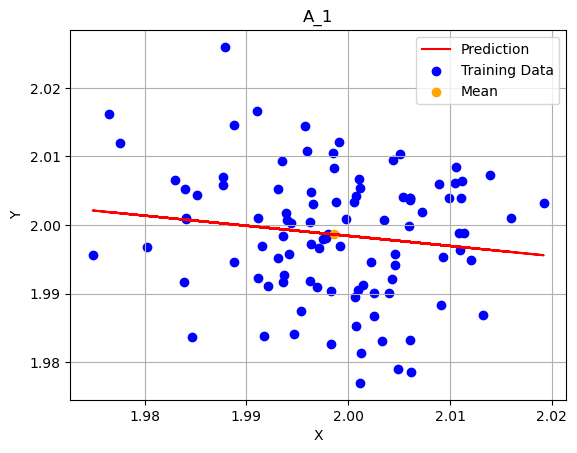

In [108]:
#predictions_A1[:,0] are x values
plt.plot(predictions_A1[:,0], predictions_A1[:,1],color='red', label='Prediction')
plt.scatter(A_1[:,0], A_1[:,1],color='blue', label='Training Data')
plt.scatter(np.mean(A_1[:,0]), np.mean(A_1[:,1]),color='orange', label='Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('A_1')
plt.legend()
plt.show()

Plotting training and predicted values for $A_2$

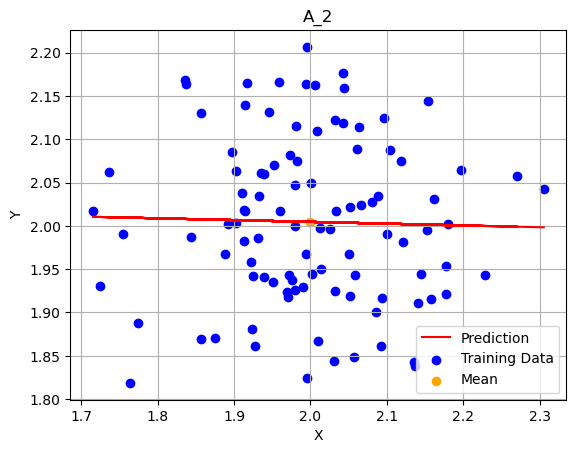

In [109]:
plt.plot(predictions_A2[:,0], predictions_A2[:,1],color='red', label='Prediction')
plt.scatter(A_2[:,0], A_2[:,1],color='blue', label='Training Data')
plt.scatter(np.mean(A_2[:,0]), np.mean(A_2[:,1]),color='orange', label='Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('A_2')
plt.legend()
plt.show()


Plotting training and predicted values for $A_3$

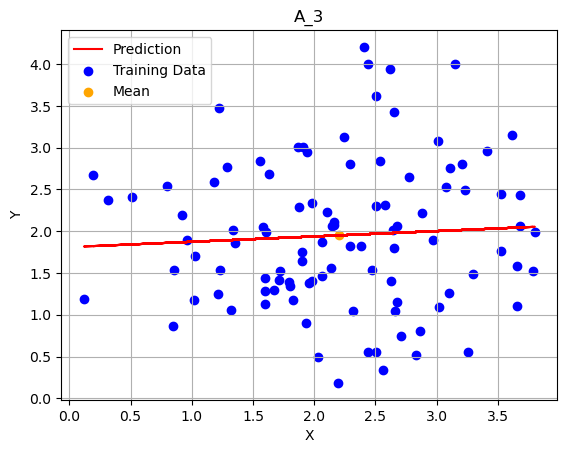

In [110]:
plt.plot(predictions_A3[:,0], predictions_A3[:,1],color='red', label='Prediction')
plt.scatter(A_3[:,0], A_3[:,1],color='blue', label='Training Data')
plt.scatter(np.mean(A_3[:,0]), np.mean(A_3[:,1]),color='orange', label='Mean')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.title('A_3')
plt.show()

Comparing Predicted lines and training values for all three $\sigma$

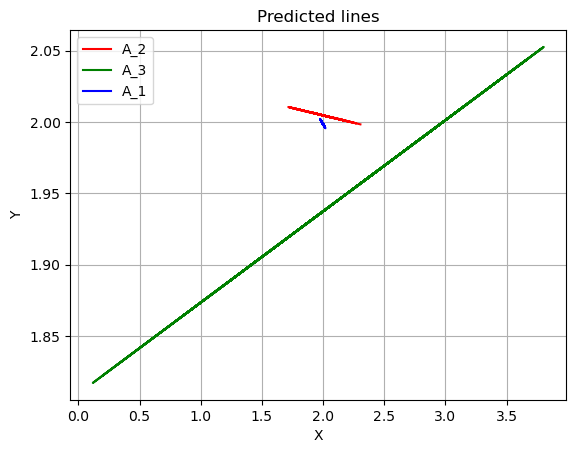

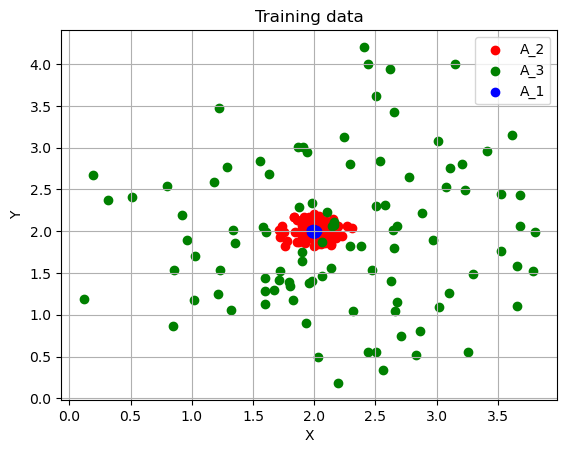

In [111]:
plt.plot(predictions_A2[:,0], predictions_A2[:,1],color='red', label='A_2')
plt.plot(predictions_A3[:,0], predictions_A3[:,1],color='green', label='A_3')
plt.xlabel('X')
plt.plot(predictions_A1[:,0], predictions_A1[:,1],color='blue', label='A_1')
plt.ylabel('Y')
plt.grid(True)
plt.title("Predicted lines")
plt.legend()
plt.show()

plt.scatter(A_2[:,0], A_2[:,1],color='red', label='A_2')
plt.scatter(A_3[:,0], A_3[:,1],color='green', label='A_3')
plt.scatter(A_1[:,0], A_1[:,1],color='blue', label='A_1')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("Training data")
plt.legend()
plt.show()

As $\sigma$ of the normal distribution increases, the data becomes increasingly dispersed from the mean in both x and y axes. This means that the total error between the prediction and training data will increase as $\sigma$  increases. In other words, the linear regression will be less accurate for increasing $\sigma$.

The means of the linear regression for smaller $\sigma$ stays centered at $\mu$, however for larger deviations the mean of the linear regression appears to be slightly shifted. This is not expected as the mean of all three matrices is set the same and may be due to the small sample size of the data.

Setting $\beta_0$ to zero and calculating predictions for $A_1$, $A_2$ and $A_3$


In [112]:
predictions_A1_b0 = np.array([[x, predict_using_slg(x, 0, beta_1_A1)] for x in A_1[:,0]])

predictions_A2_b0 = np.array([[x, predict_using_slg(x, 0, beta_1_A2)] for x in A_2[:,0]])

predictions_A3_b0 = np.array([[x, predict_using_slg(x, 0, beta_1_A3)] for x in A_3[:,0]])

Plotting new predictions with the training data for $A_1$

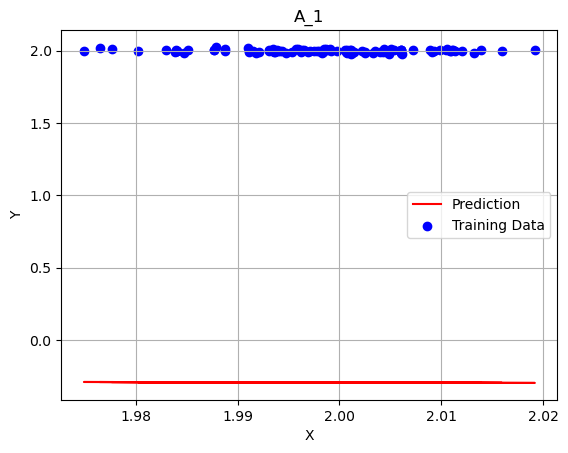

In [113]:
plt.plot(predictions_A1_b0[:,0], predictions_A1_b0[:,1],color='red', label='Prediction')
plt.scatter(A_1[:,0], A_1[:,1],color='blue', label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_1")
plt.legend()
plt.show()

Plotting new predictions with the training data for $A_2$

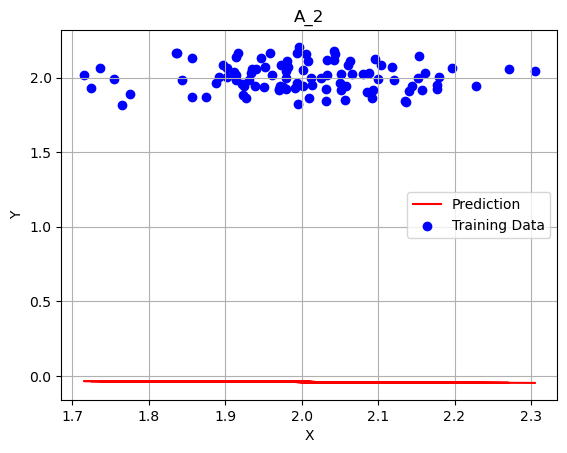

In [114]:
plt.plot(predictions_A2_b0[:,0], predictions_A2_b0[:,1],color='red', label='Prediction')
plt.scatter(A_2[:,0], A_2[:,1],color='blue', label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_2")
plt.legend()
plt.show()

Plotting new predictions with the training data for $A_3$

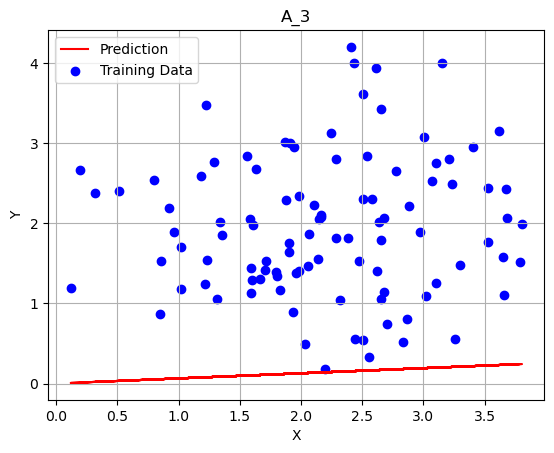

In [115]:
plt.plot(predictions_A3_b0[:,0], predictions_A3_b0[:,1],color='red', label='Prediction')
plt.scatter(A_3[:,0], A_3[:,1],color='blue', label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_3")
plt.legend()
plt.show()

Comparing predicted lines for varying $\sigma$

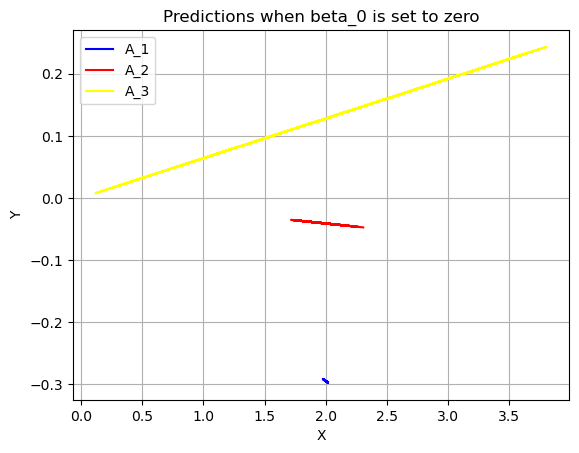

In [116]:
plt.plot(predictions_A1_b0[:,0], predictions_A1_b0[:,1],color='blue', label='A_1')
plt.plot(predictions_A2_b0[:,0], predictions_A2_b0[:,1],color='red', label='A_2')
plt.plot(predictions_A3_b0[:,0], predictions_A3_b0[:,1],color='yellow', label='A_3')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("Predictions when beta_0 is set to zero")
plt.legend()
plt.show()

Setting $\beta_0$ to zero forces the regression line to pass through the origin which causes the predictions to be shifted away from the mean $\mu$, creating bias. However, as $\sigma$ increases the bias tends to be less visible. The slope of all three regression lines remains the same as with the original predictions.

Setting $\beta_1$ to zero and calculating predictions for $A_1$, $A_2$ and $A_3$


In [117]:
predictions_A1_b1 = np.array([[x, predict_using_slg(x, beta_0_A1, 0)] for x in A_1[:,0]])

predictions_A2_b1 = np.array([[x, predict_using_slg(x, beta_0_A2, 0)] for x in A_2[:,0]])

predictions_A3_b1 = np.array([[x, predict_using_slg(x, beta_0_A3, 0)] for x in A_3[:,0]])

Plotting new predictions with the training data for $A_1$

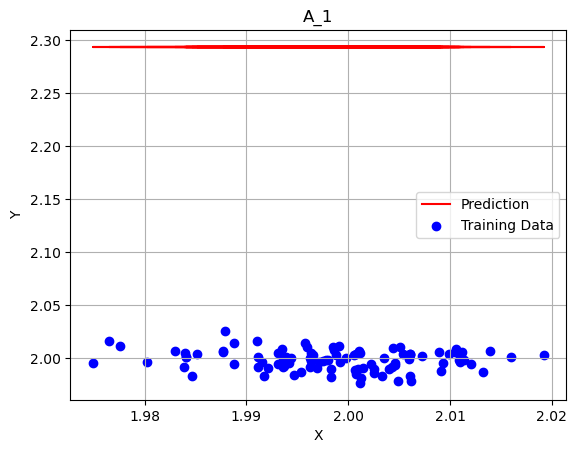

In [118]:
plt.plot(predictions_A1_b1[:,0], predictions_A1_b1[:,1],color='red', label='Prediction')
plt.scatter(A_1[:,0], A_1[:,1],color='blue', label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_1")
plt.legend()
plt.show()

Plotting new predictions with the training data for $A_2$

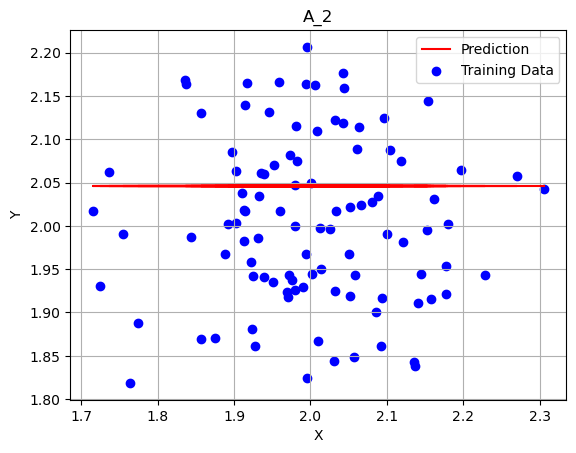

In [119]:
plt.plot(predictions_A2_b1[:,0], predictions_A2_b1[:,1],color='red', label='Prediction')
plt.scatter(A_2[:,0], A_2[:,1],color='blue', label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_2")

plt.legend()
plt.show()

Plotting new predictions with the training data for $A_3$

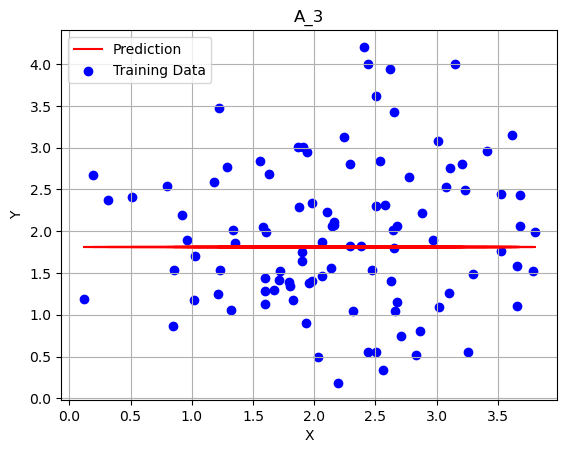

In [120]:
plt.plot(predictions_A3_b1[:,0], predictions_A3_b1[:,1],color='red', label='Prediction')
plt.scatter(A_3[:,0], A_3[:,1],color='blue', label='Training Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("A_3")

plt.legend()
plt.show()

Comparing predicted lines for varying $\sigma$

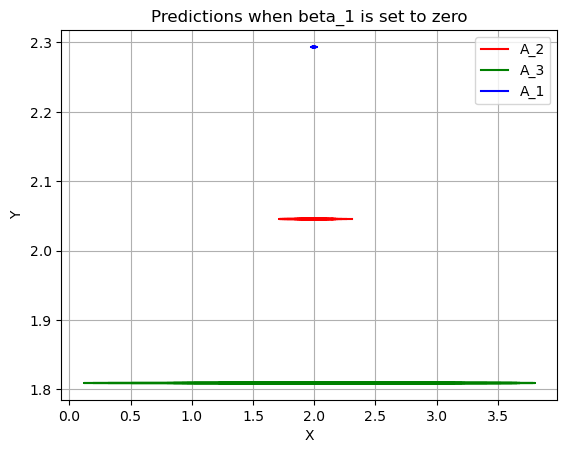

In [121]:
plt.plot(predictions_A2_b1[:,0], predictions_A2_b1[:,1],color='red', label='A_2')
plt.plot(predictions_A3_b1[:,0], predictions_A3_b1[:,1],color='green', label='A_3')
plt.plot(predictions_A1_b1[:,0], predictions_A1_b1[:,1],color='blue', label='A_1')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title("Predictions when beta_1 is set to zero")
plt.legend()
plt.show()

$\beta_1$ represents the slope of the regression line. Setting it to zero implies $y^\hat{} = \beta_0$, meaning predictions are constant regardless of $x$. This implies that the model assumes no linear relationship between $x$ and $y$.

In the plot above, the dataset with the smallest $\sigma$ appears to produce predictions that deviate most from the mean. However, assuming the dataset with the largest $\sigma$ will always result in the least bias is incorrect—here, as $A_2$ (with intermediate $\sigma$) shows the least bias. Therefore, varying $\sigma$ alone does not lead to consistent or predictable changes in the bias of linear regression. The observed bias is more likely due to random fluctuations in the sampled data rather than $\sigma$ itself. Although, as $\sigma$ increases, the noise overshadows any underlying linear trend, making the prediction bias appear smaller relative to the overall data spread.

Replacing the step of learning $\beta_0$ and $\beta_1$ with *numpy.linalg.lstsq* and *sklearn.linear model.LinearRegression*

In [122]:
def lstsq_regression(data):
    #Solves for best vector [beta_0,beta_1] for the equation X @ b = y
    x = data[:,0]
    y = data[:,1]
    X = np.column_stack((np.ones(len(x)), x))
    (beta_0, beta_1), res, rank, s = np.linalg.lstsq(X, y, rcond=None)
    return beta_0, beta_1

def sklearn_linear_regression(data):
    x = data[:, 0].reshape(-1, 1)  #Reshape to 2D array for sklearn
    y = data[:, 1]

    model = linear_model.LinearRegression()
    model.fit(x, y)

    beta_0 = model.intercept_
    beta_1 = model.coef_[0]

    return beta_0, beta_1



$(\beta_0, \beta_1)$ for $A_1$

In [123]:
print(f"Simple linear regression:{simple_linear_regression(A_1)}")
print(f"Sklearn linear regression:{sklearn_linear_regression(A_1)}")
print(f"Least squares regression: {lstsq_regression(A_1)}")

Simple linear regression:(2.2935701033551963, -0.1475768780070591)
Sklearn linear regression:(2.2935701033551976, -0.14757687800705904)
Least squares regression: (2.2935701033552096, -0.14757687800706523)


$(\beta_0, \beta_1)$ for $A_2$

In [124]:
print(f"Simple linear regression:{simple_linear_regression(A_2)}")
print(f"Sklearn linear regression:{sklearn_linear_regression(A_2)}")
print(f"Least squares regression: {lstsq_regression(A_2)}")

Simple linear regression:(2.045808411350337, -0.020609756820067306)
Sklearn linear regression:(2.045808411350337, -0.020609756820067292)
Least squares regression: (2.045808411350336, -0.020609756820066754)


$(\beta_0, \beta_1)$ for $A_3$

In [125]:
print(f"Simple linear regression:{simple_linear_regression(A_3)}")
print(f"Sklearn linear regression:{sklearn_linear_regression(A_3)}")
print(f"Least squares regression: {lstsq_regression(A_3)}")

Simple linear regression:(1.8094339614061103, 0.06394170186087283)
Sklearn linear regression:(1.80943396140611, 0.06394170186087283)
Least squares regression: (1.8094339614061101, 0.06394170186087288)


Observing the results, we can see that the values for $\beta_0$ and $\beta_1$ computed using all three algorithms results in identical values (within floating point precision). This confirms that all three approaches effectively learn the optimal intercept $(\beta_0)$ and slope $(\beta_1)$ that best fit the regression line to the training data.